In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data = pd.read_csv("cleaned_data.csv")
# Ensure your dataset has columns: 'loan_amnt', 'person_income', 'loan_status', 'loan_int_rate', 'defaulted', 'max_loan_limit'


In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")

In [16]:
def compute_dti(df):
    df['DTI'] = (df['loan_amnt'] / df['person_income']) * 100

def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

def compute_avg_interest_rate(df):
    df['Average_Interest_Rate'] = df['loan_int_rate'].mean()

def compute_lpi(df):
    df['LPI'] = df['loan_status'] * (1 - df['loan_int_rate']) / df['loan_amnt']

def compute_clv(df, avg_loan_duration):
    df['CLV'] = df['loan_amnt'] * df['loan_int_rate'] * avg_loan_duration

def compute_credit_utilization(df, max_loan_limit):
    df['Credit_Utilization_Rate'] = (df['loan_amnt'] / max_loan_limit) * 100

def compute_loan_loss_rate(df):
    defaulted_loan_amnt = df[df['loan_status'] == 1]['loan_amnt'].sum()
    total_loans_issued = df['loan_amnt'].sum()
    df['Loan_Loss_Rate'] = (defaulted_loan_amnt / total_loans_issued) * 100

def compute_income_to_loan(df):
    df['Income_to_Loan_Ratio'] = df['person_income'] / df['loan_amnt']

# Call functions to compute each KPI
compute_dti(cleaned_data)
compute_default_rate(cleaned_data)
compute_avg_interest_rate(cleaned_data)
compute_lpi(cleaned_data)
avg_loan_duration = cleaned_data['cb_person_cred_hist_length'].mean()  # Example using credit history length as loan duration
max_loan_limit = cleaned_data['loan_amnt'].max()  # Assuming max loan limit is the max loan amount in your dataset
compute_clv(cleaned_data, avg_loan_duration)
compute_credit_utilization(cleaned_data, max_loan_limit)
compute_loan_loss_rate(cleaned_data)
compute_income_to_loan(cleaned_data)


In [12]:
cleaned_data.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_grade_encoded,loan_intent_encoded,DTI,Default_Rate,Average_Interest_Rate,LPI,CLV,Credit_Utilization_Rate,Loan_Loss_Rate,Income_to_Loan_Ratio
0,-0.921615,-0.114143,0.053224,4.019404,1.558376,1,3.931411,-0.691554,3,1,3,4,-3521.366715,21.816396,3.140424e-17,-0.138920,-3.497033e-16,100.000000,-7.795141e+16,-0.028398
1,-1.082791,-0.911147,0.053224,-1.358650,0.039232,0,-0.657458,-0.938167,2,0,1,1,149.114294,21.816396,3.140424e-17,-0.000000,2.975845e-18,-33.802277,-7.795141e+16,0.670627
2,-0.438089,-0.911147,-0.952040,-0.646849,0.577781,1,3.744110,-0.691554,0,0,2,3,70.992821,21.816396,3.140424e-17,-0.652732,2.086564e-17,-16.093152,-7.795141e+16,1.408593
3,-0.760440,-0.009274,-0.198092,4.019404,1.312449,1,3.369508,-0.938167,3,0,2,3,-43338.613946,21.816396,3.140424e-17,-0.077735,-2.945167e-16,100.000000,-7.795141e+16,-0.002307
4,-0.599264,-0.188358,0.807172,4.019404,1.013601,1,3.556809,-0.444942,3,1,2,3,-2133.915141,21.816396,3.140424e-17,-0.003384,-2.274544e-16,100.000000,-7.795141e+16,-0.046862


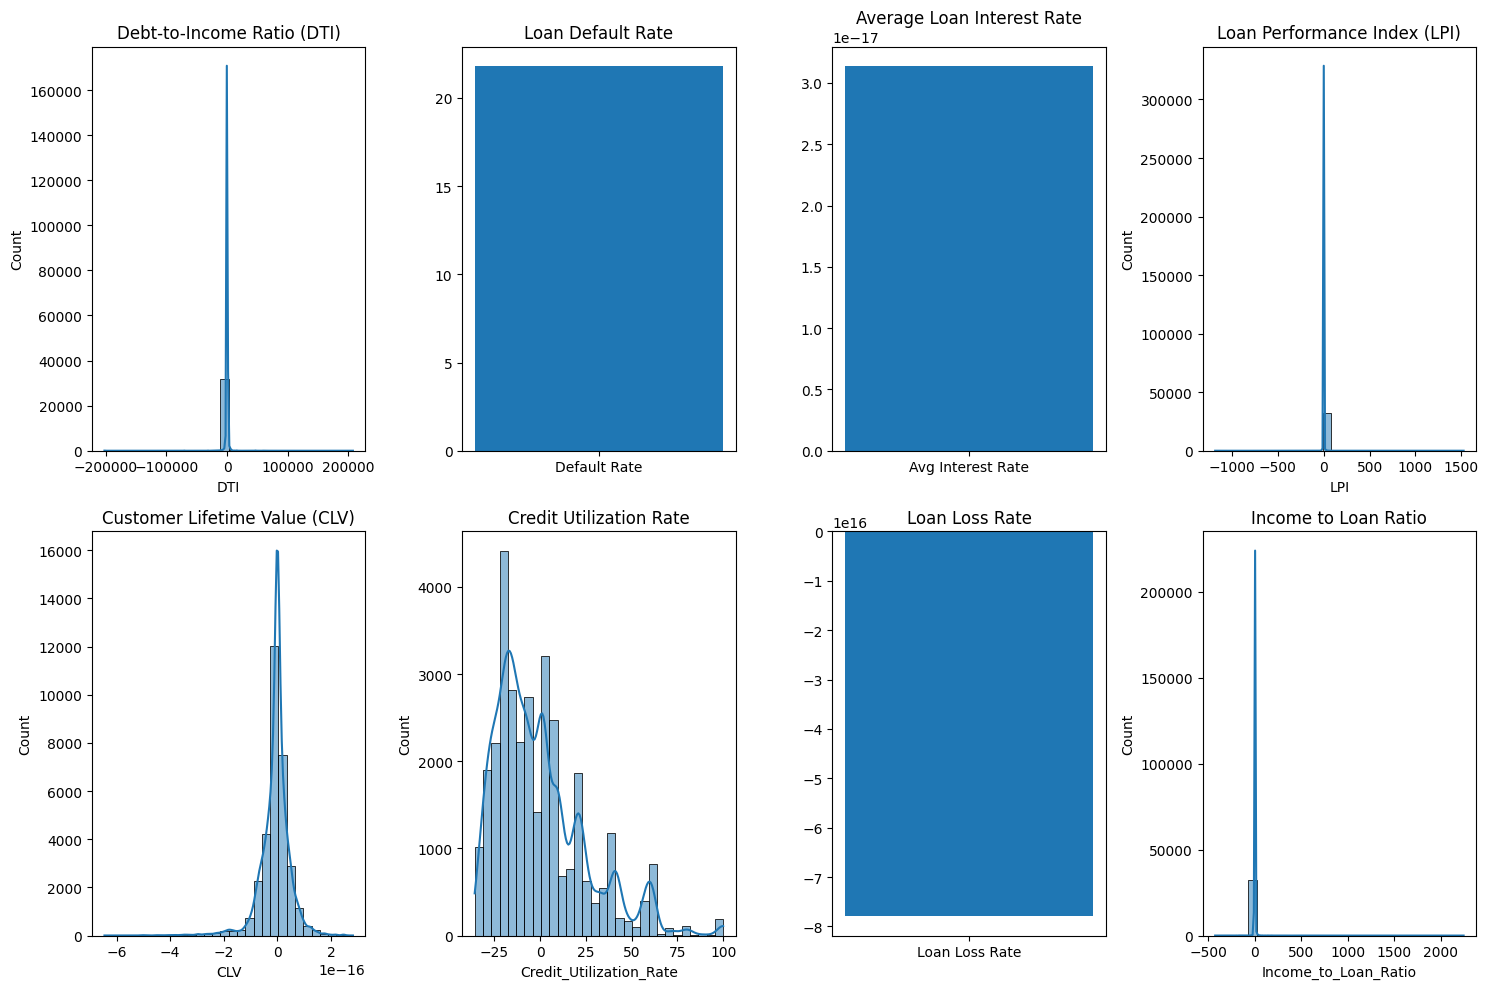

In [20]:
plt.figure(figsize=(15, 10))

# Debt-to-Income Ratio
plt.subplot(2, 4, 1)
sns.histplot(cleaned_data['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio (DTI)')

# Loan Default Rate
plt.subplot(2, 4, 2)
plt.bar(['Default Rate'], [cleaned_data['Default_Rate'].iloc[0]])
plt.title('Loan Default Rate')

# Average Loan Interest Rate
plt.subplot(2, 4, 3)
plt.bar(['Avg Interest Rate'], [cleaned_data['Average_Interest_Rate'].iloc[0]])
plt.title('Average Loan Interest Rate')

# Loan Performance Index (LPI)
plt.subplot(2, 4, 4)
sns.histplot(cleaned_data['LPI'], bins=30, kde=True)
plt.title('Loan Performance Index (LPI)')

# Customer Lifetime Value (CLV)
plt.subplot(2, 4, 5)
sns.histplot(cleaned_data['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV)')

# Credit Utilization Rate
plt.subplot(2, 4, 6)
sns.histplot(cleaned_data['Credit_Utilization_Rate'], bins=30, kde=True)
plt.title('Credit Utilization Rate')

# Loan Loss Rate
plt.subplot(2, 4, 7)
plt.bar(['Loan Loss Rate'], [cleaned_data['Loan_Loss_Rate'].iloc[0]])
plt.title('Loan Loss Rate')

# Income to Loan Ratio
plt.subplot(2, 4, 8)
sns.histplot(cleaned_data['Income_to_Loan_Ratio'], bins=30, kde=True)
plt.title('Income to Loan Ratio')

plt.tight_layout()
plt.show()
